In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
from matplotlib.patches import FancyArrowPatch

In [2]:
def set_subplot(ax, x_data, y_data, xlabel, ylabel, title, line_color='#120a8f', linewidth=1.5):
  line, = ax.plot(x_data, y_data, linestyle='-',
                  color=line_color, linewidth=linewidth)
  ax.set_xlabel(xlabel, fontsize=18)
  ax.set_ylabel(ylabel, fontsize=18)
  ax.grid(linestyle='--')
  ax.set_title(title, fontsize=20)
  ax.tick_params(axis='both', direction='in', length=4, width=1,
                 colors='black', top=True, right=True, labelsize=16)

  return line

In [3]:
# Parameter definition - REAL

R11 = 0.1
R12 = 0.1
R21 = 0.1
R22 = 0.1
Req = (R12 * R22) / (R12 + R22)
Rcrl = 20
Rk = 0.1
# CVCK_O = 2.2e-3
C1 = 2.2e-3
C2 = 2.2e-3
Ck = 2.2e-3
L1 = 1e-3
L2 = 1e-3
Lk = 1e-3

VCK_O = 20.
VC1_O = 24.
VIN1_O = 36.
VIN2_O = 12.
PCPL_OP = 50.

IB_O = 14

ILK_O = VCK_O / Rcrl + PCPL_OP / VCK_O
VC2_O = R22 * ILK_O * ((Rk + Req) / Req) + (R22 * VCK_O) / \
    Req - (R22 * VC1_O) / R12 + R22 * IB_O
IL1_O = (1. / R12) * (1 - (Req / R12)) * VC1_O + (Req * ILK_O) / \
    R12 - VC2_O / (R12 + R22) + (Req * IB_O) / R12
UD1_O = (R11 / VIN1_O) * IL1_O + VC1_O / VIN1_O

a = R21 / VC2_O
b = - VIN2_O / VC2_O
c = -((1 / R22) * (1 - (Req / R22)) *
      VC2_O + (Req / R22) * ILK_O - (1 / (R12 + R22)) * VC1_O + (Req / R22) * IB_O)

delta = b**2 - 4 * a * c
x1 = (-b + math.sqrt(delta)) / (2 * a)
x2 = (-b - math.sqrt(delta)) / (2 * a)

IL2_O = x1
UD2_O = 1 + (R21 * IL2_O) / VC2_O + VIN2_O / VC2_O
# UD2_O = 0.43

UD1_MAX = 1 - UD1_O
UD1_MIN = UD1_O

UD2_MAX = 1 - UD2_O
UD2_MIN = UD2_O

δVCK_MIN = -0.1
δVCK_MAX = 0.1
δVIN1_MIN = -0.2
δVIN1_MAX = 0.2
δVC2_MIN = -0.1
δVC2_MAX = 0.1
δIL2_MIN = -0.1
δIL2_MAX = 0.1


z11 = 1 / (Ck * VCK_O*(VCK_O + δVCK_MIN))
z12 = 1 / (Ck * VCK_O*(VCK_O + δVCK_MAX))

z21 = δVIN1_MIN
z22 = δVIN1_MAX

z31 = δVC2_MIN
z32 = δVC2_MAX

z41 = δIL2_MIN
z42 = δIL2_MAX

Z = np.array([[min(z11, z12), max(z11, z12)],
             [min(z21, z22), max(z21, z22)],
             [min(z31, z32), max(z31, z32)],
             [min(z41, z42), max(z41, z42)]])

print(Z)

step = 1e-5
timepts = np.arange(0, 1e-1 + step, step)
# timepts = np.arange(0, 0.5e-1 + step, step)

# U = np.array([min(UD1_MIN, UD1_MAX), min(UD2_MIN, UD2_MAX), IB_O, VIN1_O, VIN2_O, PCPL_OP])
# U_O = np.array([UD1_O, UD2_O, IB_O, VIN1_O, VIN2_O, PCPL_OP])
U = np.array([UD1_O, UD2_O, IB_O, VIN1_O, VIN2_O, PCPL_OP])
U_O = np.array([UD1_O, UD2_O, IB_O, VIN1_O, VIN2_O, PCPL_OP])

X0 = 1.2 * np.array([IL1_O, IL2_O, ILK_O, VC1_O, VC2_O, VCK_O])
X0_O = np.array([IL1_O, IL2_O, ILK_O, VC1_O, VC2_O, VCK_O])

δU = U - U_O
δX0 = X0 - X0_O

params = {
    'L1': L1,
    'R11': R11,
    'C1': C1,
    'R12': R12,
    'L2': L2,
    'R21': R21,
    'C2': C2,
    'R22': R22,
    'Lk': Lk,
    'Rk': Rk,
    'Ck': Ck,
    'Rcrl': Rcrl,
    'IB_O': IB_O,
    'VIN1_O': VIN1_O,
    'VIN2_O': VIN2_O,
    'VC1_O': VC1_O,
    'VCK_O': VCK_O,
    'PCPL_OP': PCPL_OP,
}

print(f"ILK_O = {ILK_O}, UD1_O = {UD1_O}, UD2_O = {UD2_O}, VC2_O = {VC2_O}")

[[ 1.13071009  1.14207401]
 [-0.2         0.2       ]
 [-0.1         0.1       ]
 [-0.1         0.1       ]]
ILK_O = 3.5, UD1_O = 0.7680555555555557, UD2_O = 2.0282987048651018, VC2_O = 18.449999999999985


In [4]:
def z1(δvCK):
  return (1. / (Ck * VCK_O*(VCK_O + δvCK)))


def z2(δv_in1):
  return (δv_in1)


def z3(δv_c2):
  return (δv_c2)


def z4(δi_l2):
  return (δi_l2)


def A(z):

  #   A12 = A13 = A15 = A16 = A21 = A23 = A24 = A26 = A31 = A32 = A42 = A46 = A51 = A56 = A61 = A62 = A64 = A65 = 0
  A11 = - R11 / L1
  A14 = - 1. / L1
  A22 = - R21 / L1
  A25 = - ((R11 * IL2_O)/(L2 * VC2_O) - (VIN2_O / (L2 * VC2_O)))
  A33 = - ((Rk + Req) / Lk)
  A34 = Req / (R12 * Lk)
  A35 = Req / (R22 * Lk)
  A36 = - 1. / Lk
  A41 = 1. / C1
  A43 = Req / (R12 * C1)
  A44 = - (1. / (R12 * C1)) * (1 - Req / R12)
  A45 = 1 / (C1 * (R12 + R22))
  A52 = 1 / C2 * (1 - UD2_O)
  A53 = - Req / (R12 * C2)
  A54 = 1 / (C2 * (R12 + R22))
  A55 = - (1. / (R22 * C2)) * (1 - Req / R12)
  A63 = 1 / Ck
  A66 = - (1. / (Rcrl * Ck)) + PCPL_OP * z[0]

  return np.array([[A11,   0,   0, A14,   0,   0],
                   [0, A22,   0,   0, A25,   0],
                   [0,   0, A33, A34, A35, A36],
                   [A41,   0, A43, A44, A45,   0],
                   [0, A52, A53, A54, A55,   0],
                   [0,   0, A63,   0,   0, A66]])


def B(z):
  #   B12 = B13 = B21 = B23 = B31 = B32 = B41 = B42 = B51 = B61 = B62 = B63 = 0
  B11 = (VIN1_O + z[1]) / L1
  B22 = 1 / L2 * (VC2_O + z[2])
  B33 = - Req / Lk
  B43 = - Req / (R12 * C1)
  B52 = - (1. / C2) * (IL2_O + z[3])
  B53 = - Req / (R22 * C2)
  return np.array([[B11,   0,   0],
                   [0, B22,   0],
                   [0,   0, B33],
                   [0,   0, B43],
                   [0, B52, B53],
                   [0,   0,   0]])


def E(z):
  #   E12 = E13 = E21 = E23 = E31 = E32 = E33 = E41 = E42 = E43 = E51 = E52 = E53 = E61 = E62 = 0
  E11 = (1. / L1) * ((R11 / VIN1_O) * IL1_O + VC1_O / VIN1_O)
  E22 = 1. / L2
  E63 = - VCK_O * z[0]
  return np.array([[E11,   0,   0],
                   [0, E22,   0],
                   [0,   0,   0],
                   [0,   0,   0],
                   [0,   0,   0],
                   [0,   0, E63],])


def upd_fuzzy(t, x, u, params):
  δud1, δud2, δuiB, δv_in1, δv_in2, δPl = u
  δiL1, δiL2, δiLK, δvC1, δvC2, δvCK = x

  B2 = list(itertools.product([0, 1], repeat=len(Z)))

  δx_dot = 0
  x = np.array([[δiL1], [δiL2], [δiLK], [δvC1], [δvC2], [δvCK]])
  u = np.array([[δud1], [δud2], [δuiB]])
  w = np.array([[δv_in1], [δv_in2], [δPl]])

  zt = [z1(δvCK), z2(δv_in1), z3(δvC2), z4(δiL2)]

  M = []
  for i in range(0, 4):
    m = (zt[i] - Z[i][0]) / (Z[i][1] - Z[i][0])
    M.append([1. - m, m])

  for p in B2:
    hp = 1.
    z = []
    for i, b in enumerate(p):
      hp *= M[i][b]
      z.append(Z[i][b])

    Ap = A(z)
    Bp = B(z)
    Ep = E(z)

    δx_dot += hp * (Ap @ x + Bp @ u + Ep @ w)

  return δx_dot


fuzzy_model = ct.ss(upd_fuzzy, None, inputs=6, outputs=6, states=6)

In [5]:
t, y = ct.input_output_response(
    sys=fuzzy_model, T=timepts,
    U=list(δU), X0=δX0, params=params,
)

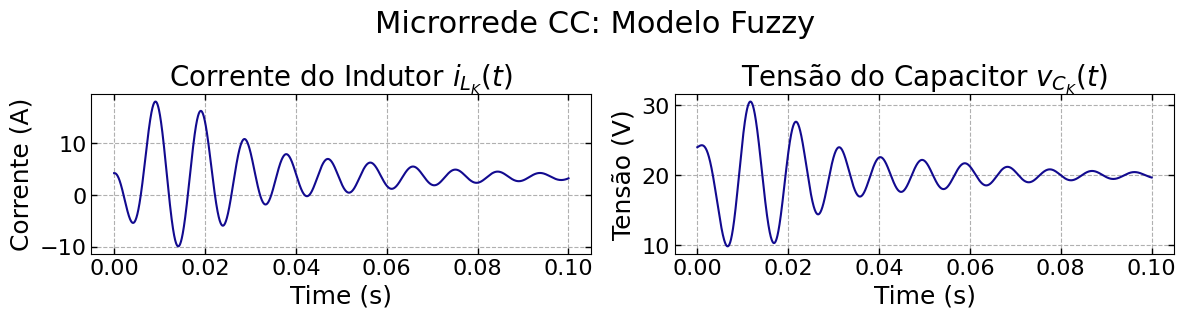

In [6]:
# Definindo o tamanho da figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 3.2))

# Adicionando o título à figura
fig.suptitle("Microrrede CC: Modelo Fuzzy", fontsize=22)

set_subplot(
    axs[0], t, y[2] + ILK_O,
    'Time (s)', 'Corrente (A)', 'Corrente do Indutor $i_{L_K}(t)$',
)

# Configurando o subplot da Tensão do Capacitor
set_subplot(
    axs[1],  t, y[5] + VCK_O,
    'Time (s)', 'Tensão (V)', 'Tensão do Capacitor $v_{C_K}(t)$',
)

plt.tight_layout()

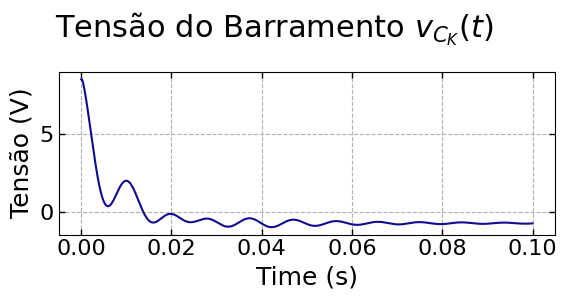

In [7]:
VE = (Req / R12) * y[1] + (Req / R22) * y[3] - Req * IB_O - Req * y[4]

# Definindo o tamanho da figura e os subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 3))

# Adicionando o título à figura
fig.suptitle("Tensão do Barramento $v_{C_K}(t)$", fontsize=22)

# set_subplot(
#     axs[0], t, y[2],
#     'Time (s)', 'Corrente (A)', 'Corrente do Indutor $i_{L_K}(t)$',
# )

# Configurando o subplot da Tensão do Capacitor
set_subplot(
    axs,  t, VE,
    'Time (s)', 'Tensão (V)', '',
)

plt.tight_layout()